In [1]:
import dill
dill.load_session("ss2.pkl")

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("cointoss_AB.csv")

In [6]:
a_toss = df["A"]
b_toss = df["B"]

In [7]:
a_ind = np.array(a_toss[a_toss == 1].index)
b_ind = np.array(b_toss[b_toss == 1].index)
a_ind += 1
b_ind += 1

In [8]:
count_lista = [a_ind[0]]
for i in range(1,a_ind.size):
    diff = a_ind[i] - a_ind[i-1]
    count_lista.append(diff)
count_lista = np.array(count_lista)

count_listb = [b_ind[0]]
for i in range(1,b_ind.size):
    diff = b_ind[i] - b_ind[i-1]
    count_listb.append(diff)
count_listb = np.array(count_listb)

In [9]:
binneda = pd.cut(count_lista, bins = [1,2,3,4,5,6,7,8], right=False, labels=[1,2,3,4,5,6,7])
binnedb = pd.cut(count_listb, bins = [1,2,3,4,5,6,7,8], right=False, labels=[1,2,3,4,5,6,7])

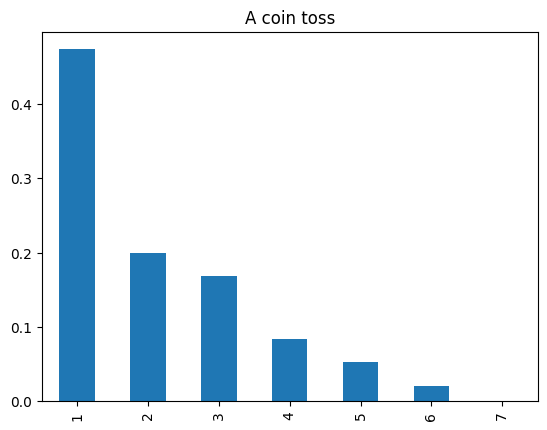

In [2]:
newa = binneda.value_counts() / binneda.value_counts().sum()
newa.plot(kind = "bar")
plt.title("A coin toss")
plt.show()

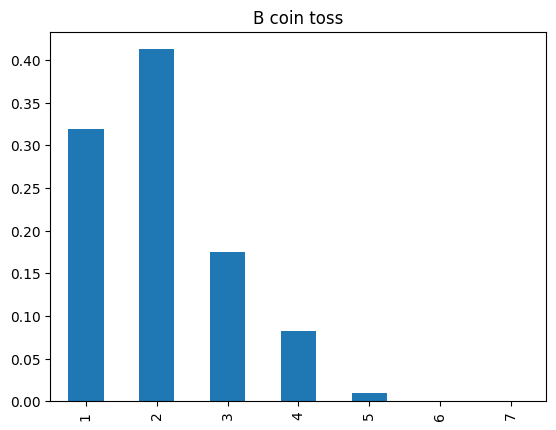

In [3]:
newa = binnedb.value_counts() / binnedb.value_counts().sum()
newa.plot(kind = "bar")
plt.title("B coin toss")
plt.show()

In [2]:
observed_A = (binneda.value_counts() / len(binneda))
observed_B = (binnedb.value_counts() / len(binnedb))

In [19]:
observed_A = binneda.value_counts()
observed_A

1    45
2    19
3    16
4     8
5     5
6     2
7     0
Name: count, dtype: int64

In [20]:
observed_B = binnedb.value_counts()
observed_B

1    31
2    40
3    17
4     8
5     1
6     0
7     0
Name: count, dtype: int64

In [18]:
from scipy.stats import chisquare

In [6]:
x = np.arange(1,8)
expected = pd.Series(np.power(0.5, x), index = range(1,8))
# expected = (expected * scale).round()
expected = expected * observed_B.sum() / expected.sum()
# expected = expected * scale / scale
expected

1    48.881890
2    24.440945
3    12.220472
4     6.110236
5     3.055118
6     1.527559
7     0.763780
dtype: float64

In [ ]:
chi2, p_value = chisquare(f_obs= observed_B, f_exp=expected)
print(f"Chisquare for Observed_B-> {chi2:.5f} \nP value -> {p_value:.5f}")

Chisquare for Observed_A-> 5.49293 
P value -> 0.48231

Chisquare for Observed_B-> 22.57394 
P value -> 0.00095

In [7]:
import dill
dill.dump_session("ss2.pkl")